# TEAM NAME ETC

# Overview

Our task is to build an inferential linear regression model. Our model will help Opendoor make more accurate offers in accordance with their valuation process. We will follow the assumptions of linear regression which are linearity, independence, normality, and homoscedasticity. We will also strive to have a high R^2 value, signaling that our parameters are explaining much of the total variance in house sales.

# Business Understanding

Our stakeholder is Opendoor. Opendoor makes cash offers for homes and resells them. They perform repairs on the home if necessary. They also offer a listing service. They make their profits from fees, not from buying low and selling high. We will be assisting this company in the King County, Washington area. The county seat is Seattle.

The Opendoor process begins with evaluations of a home through photos, listed upgrades, and listed amenities. Next, they find comparable homes or 'comps' to provide a base range. Next, they make adjustments to the offer based on differences between comps. These differences can include features or neighborhood trends. Lastly, they make an offer and send someone to inspect the home.

Our job is to analyze the King County data set and provide solid valuation models that can assist with finding comp valuations, and then detailing the needed adjustments. Different markets have slight differences, and we will report on the most important parameters when assessing home values in the King County area. Since they also do repairs, we will also look at factors that assess the condition and amount of repairs likely needed in the property. Opendoor will be able to use our recommendations to make fair offers in the King County area.

# Data Understanding

The data that we used is King County House Sales data from the King County assessor website. 

Summary information for 'Condition' and 'Grade' can be found here: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

## *Loading our data*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## *Dealing with missing values*

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df['waterfront'].value_counts()
#2376 entries missing data

NO     19075
YES      146
Name: waterfront, dtype: int64

In [9]:
df['view'].value_counts()
#19422 none, so 63 missing data

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [10]:
df['yr_renovated'].value_counts()
#3842 missing values

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

## Column Formatting

### *Renovated < 10 yrs*

In [11]:
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)
df['renovated_less_10yrs'] = df['yr_renovated'] > 2010.0
df['renovated_less_10yrs'] = df['renovated_less_10yrs'].astype('int64')
df['renovated_less_10yrs'].value_counts()

0    21462
1      135
Name: renovated_less_10yrs, dtype: int64

### *Condition Column*

In [12]:
df['condition'].replace('Poor', '1', inplace=True)
df['condition'].replace('Fair', '2', inplace=True)
df['condition'].replace('Average', '3', inplace=True)
df['condition'].replace('Good', '4', inplace=True)
df['condition'].replace('Very Good', '5', inplace=True)
df['condition'] = df['condition'].astype(np.int64)
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

### *View Column*

In [13]:
df['view'].fillna('NONE', inplace=True)
df['view'].replace('NONE', '0', inplace=True)
df['view'].replace('FAIR', '1', inplace=True)
df['view'].replace('AVERAGE', '2', inplace=True)
df['view'].replace('GOOD', '3', inplace=True)
df['view'].replace('EXCELLENT', '4', inplace=True)
df['view'] = df['view'].astype(np.int64)
df['view'].value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

### *Sqft Basement Column*

In [14]:
df['sqft_basement'].replace(to_replace='?', value='0', inplace=True)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'],errors='coerce')
df['has_basement'] = df['sqft_basement']
df.loc[df.has_basement > 0, 'has_basement'] = 1
df['has_basement'].value_counts()

0.0    13280
1.0     8317
Name: has_basement, dtype: int64

### *Date Column*

In [15]:
# Converting to Datetime
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y')
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

### *Waterfront Column*

In [16]:
# Converting Waterfront to Binary
df['waterfront'] = df['waterfront'].fillna('0')
df['waterfront'].replace(to_replace='NO', value='0', inplace=True)
df['waterfront'].replace(to_replace='YES', value='1', inplace=True)
df['waterfront'] = pd.to_numeric(df['waterfront'],errors='coerce')
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

### *Grade Column*

In [17]:
# Converting Grade to Numeric
df['grade'] = df['grade'].str.slice(0,2).str.strip()
df['grade'] = df['grade'].astype(np.int64)
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [18]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(21597, 23)
id                               int64
date                    datetime64[ns]
price                          float64
bedrooms                         int64
bathrooms                      float64
sqft_living                      int64
sqft_lot                         int64
floors                         float64
waterfront                       int64
view                             int64
condition                        int64
grade                            int64
sqft_above                       int64
sqft_basement                  float64
yr_built                         int64
yr_renovated                   float64
zipcode                          int64
lat                            float64
long                           float64
sqft_living15                    int64
sqft_lot15                       int64
renovated_less_10yrs             int64
has_basement                   float64
dtype: object
['id' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'wate

In [19]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated_less_10yrs',
       'has_basement'],
      dtype='object')

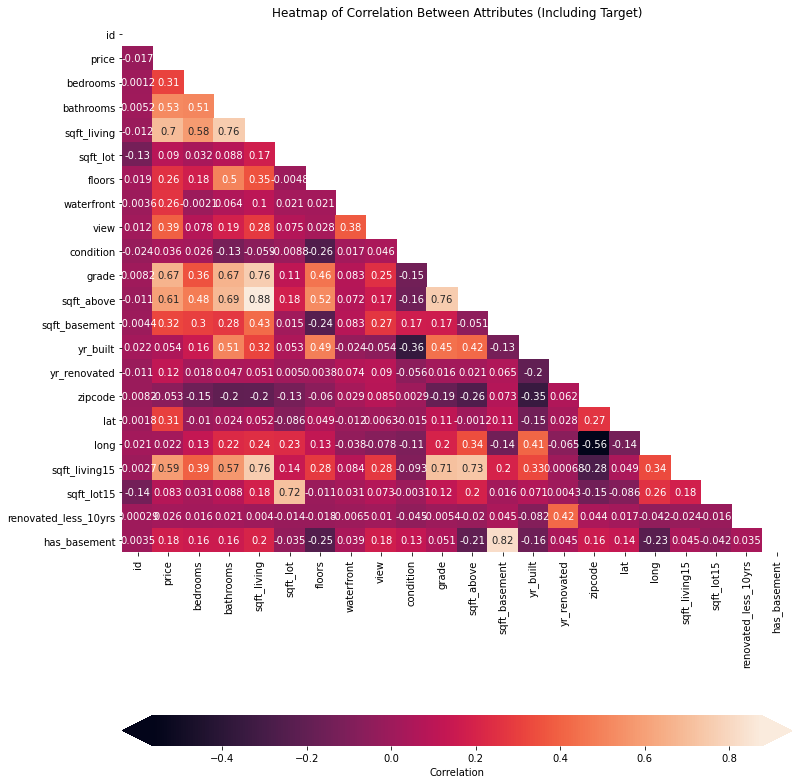

In [20]:
# Create a df with the target as the first column,
# then compute the correlation matrix
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");


# Modeling

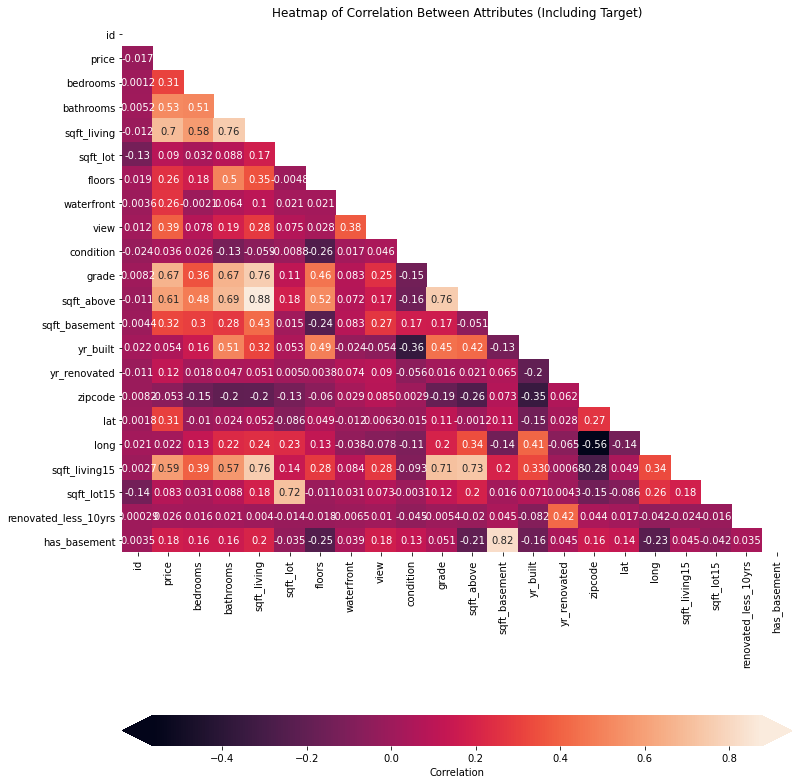

In [21]:
# heatmap_data = pd.concat([y_train, X_train], axis=1)
# corr = heatmap_data.corr()
corr = df.corr()
# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 15))
# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)
# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [22]:
#baseline model
baseline_y = df['price'].mean()
baseline_x = df.drop('price', axis=1)

## *Filtering columns*

In [23]:
# y = df["price"]
# X = df.drop("price", axis=1)

In [24]:
# df.shape

In [25]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

NameError: name 'X' is not defined

In [ ]:
# print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
# print(f"y_train is a Series with {y_train.shape[0]} values")

In [ ]:
# X_train.info()

In [ ]:
# relevant_columns = [
#     'bedrooms',
#     'bathrooms',
#     'sqft_living',
#     'sqft_lot',
#     'floors',
#     'sqft_above',
#     'yr_built',
#     'yr_renovated',
#     'zipcode',
#     'lat',
#     'long',
#     'sqft_living15',
#     'sqft_lot15'
# ]

In [ ]:
# X_train = X_train[relevant_columns]
# X_train

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 5))

# ax.hist(y_train, bins=100)

# ax.set_xlabel("House Sales Price")
# ax.set_ylabel("Count of Houses Sold")
# ax.set_title("Distribution of House Sale Prices");

## Baseline Model

In [26]:
df['mean_price'] = df['price'].mean()
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated_less_10yrs',
       'has_basement', 'mean_price'],
      dtype='object')

In [29]:
baseline_y = df['price']
baseline_x = df['mean_price']
from sklearn.model_selection import train_test_split

baseline_X_train, baseline_X_test, baseline_y_train, baseline_y_test = train_test_split(baseline_x, baseline_y, random_state=42)

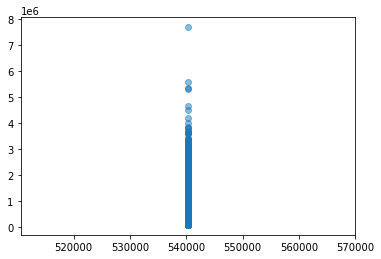

In [32]:
fig, ax = plt.subplots()
ax.scatter(baseline_X_train, baseline_y_train, alpha=0.5);

In [33]:
from statsmodels.formula.api import ols
baseline_formula = 'baseline_y ~ baseline_x'
baseline_model = ols(baseline_formula, df).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             baseline_y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 04 Oct 2021   Prob (F-statistic):                nan
Time:                        14:21:52   Log-Likelihood:            -3.0739e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21596   BIC:                         6.148e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.851e-06   8.56e-09    216.136      0.000    1.83e-06    1.87e-06
baseline_x     1.0000      0.005    216.136      0.000       0.991       1.009
==============================================================================
Omnibus:                    19103.129   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1131390.146
Skew:                           4.023   Prob(JB):                         0.00
Kurtosis:                      37.533   Cond. No.                     5.75e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.91e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## First Model

In [34]:
y = df["price"]
X = df.drop("price", axis=1)

In [35]:
df.shape

(21597, 24)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

C:\Users\dougl\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


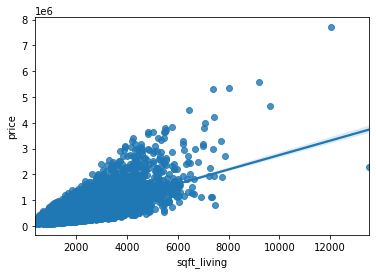

In [37]:
most_correlated_feature = 'sqft_living'
# fig, ax = plt.subplots()
# ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
# ax.set_xlabel('Square Feet Living')
# ax.set_ylabel("Price (100K's)")
# ax.set_title('Square Feet to Price')

sns.regplot(X_train[most_correlated_feature],y_train);


In [43]:
from statsmodels.formula.api import ols
first_formula = 'price ~ sqft_living'
first_model = ols(first_formula, df).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:26:39   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### *Video Code for RMSE*

In [ ]:
y_pred = baseline_y_train.mean()
y_pred

In [ ]:
y_pred2 = [y_pred]*len(baseline_y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# mean_abs_e = mean_absolute_error(baseline_y_train, y_pred2)
# mean_abs_e

In [ ]:
mean_sq_e = mean_squared_error(baseline_y_train, y_pred2)
mean_sq_e


In [ ]:
root_means_e = math.sqrt(mean_sq_e)
root_means_e

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred3 = [y_pred] * len(baseline_y_test)
# mae = mean_absolute_error(baseline_y_test, y_pred3)
rmse = (mean_squared_error(baseline_y_test, y_pred3))**0.5
print(f'rmse: {rmse}')

In [ ]:
# from sklearn.linear_model import LinearRegression

# baseline_model = LinearRegression()

In [ ]:
# from sklearn.model_selection import cross_validate, ShuffleSplit

# splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

# baseline_scores = cross_validate(
#     estimator=baseline_model,
#     X=X_train[[most_correlated_feature]],
#     y=y_train,
#     return_train_score=True,
#     cv=splitter
# )

# print("Train score:     ", baseline_scores["train_score"].mean())
# print("Validation score:", baseline_scores["test_score"].mean())

# Regression Results

# Conclusion